# Loading packages

In [1]:
#Comment out the other paths and comment in your path
path = r'C:\Users\heuse\Desktop\SE_Risk_Management-1/' #Daniel Path
#path = '/Users/mandoholzknecht/SE_Risk_Management/' # Path Mando
#path = 'C:/Users/Fabio/OneDrive/Dokumente/Uni Innsbruck/WS20/Applied risk mgmt/SE/Heusli/SE_Risk_Management/' # Path Fabio

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.anova as anova
import scipy as sci

from sklearn import metrics

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import datetime


# Loading the data

Loading the Training dataset + Test dataset

In [2]:
# use the realtive path finding
df_train = pd.read_csv(path + 'Training_Dataset.csv', sep=';', index_col=None)
df_test = pd.read_csv(path + 'Test_Dataset.csv', sep=';', index_col=0)

df_train.head(10)

,id,default,legal_form,zip_code,sector,year_inc,count_emp,type_pl,sales,gross_performance,...,bonds_payables_lt,total_equity,current_assets,monetary_current_assets,cash,trade_receivables_st,trade_receivables_lt,cf_operating,cf_investment,cf_financing
0,C_405,0,GmbH & Co. KG,12359,46730,1900,NaN,GKV,1.068738e+08,1.068738e+08,...,NaN,3.224471e+07,3.783199e+07,1.711147e+07,10297047.50,NaN,NaN,6.986094e+06,-1.112342e+06,-7520392.09
1,C_292,0,GmbH & Co. KG,10719,70101,1976,NaN,GKV,1.393869e+06,1.407889e+06,...,NaN,4.508026e+06,4.669179e+06,9.278377e+05,926383.75,NaN,NaN,-4.343980e+06,1.174427e+06,1128108.08
2,C_746,0,GmbH,13353,87100,1962,323.0,GKV,3.864034e+06,7.597353e+05,...,NaN,5.164048e+04,2.810119e+07,1.111696e+07,9146283.79,617816.28,NaN,9.548544e+06,-7.536444e+06,-22026.07
3,C_838,0,AG,12529,68320,1972,1.0,GKV,4.384786e+06,4.405058e+06,...,NaN,1.182011e+07,8.238474e+06,7.519183e+06,6890565.23,319848.26,NaN,1.715799e+06,-6.561222e+05,-169655.66
4,C_495,0,Einzelfirma,12165,47730,1908,NaN,GKV,1.104478e+08,1.104478e+08,...,NaN,4.547445e+08,3.546565e+07,8.545184e+06,5036615.09,516646.73,NaN,1.301809e+08,-1.419776e+08,12567030.80
5,C_494,0,GmbH,13055,68201,1990,415.0,GKV,4.518042e+04,4.518042e+04,...,NaN,7.953387e+04,8.484770e+04,8.061511e+04,75679.79,NaN,NaN,1.800497e+04,-3.787100e+02,0.00
6,C_300,0,GmbH,10969,68200,1991,2.0,GKV,1.508435e+08,1.479894e+08,...,NaN,6.657375e+08,8.479909e+07,3.142807e+07,11542490.91,326731.07,8000.0,4.007555e+07,-8.337054e+06,-34594274.52
7,C_453,0,GmbH,16792,78100,1991,NaN,GKV,2.843420e+08,2.843420e+08,...,NaN,2.883814e+09,4.229090e+08,4.312550e+08,21696000.00,448000.00,NaN,5.861770e+08,-7.339750e+08,-95826000.00
8,C_924,0,GmbH,13125,86101,1991,283.0,GKV,9.811591e+06,9.681040e+06,...,NaN,2.032968e+07,7.366730e+06,5.421665e+06,322573.88,372298.68,NaN,4.369386e+05,-1.879056e+06,-13729379.17
9,C_976,0,GmbH,12681,71122,1999,NaN,GKV,1.384595e+05,1.384595e+05,...,NaN,1.552805e+06,4.966969e+05,4.500943e+04,35726.57,NaN,NaN,1.947540e+05,3.318306e+05,-798859.83


# Understanding your data


## Univartiate descriptive anaylsis

The datatype of the variables is important as in dermines how you have to look at the data

In [3]:
catvar = [i for i in list(df_train.columns) if df_train[i].dtype=='O']
catvar # categorial variables

['id', 'legal_form', 'type_pl']

In [4]:
numvar = [i for i in list(df_train.columns) if df_train[i].dtype in ['float64','int64']]
numvar # numberical variables

['default',
 'zip_code',
 'sector',
 'year_inc',
 'count_emp',
 'sales',
 'gross_performance',
 'gross_profit',
 'earn_from_op',
 'fin_result',
 'oth_interest_inc',
 'oth_interest_exp',
 'result_from_ord_bus',
 'total_result',
 'annual_profit',
 'total_assets',
 'total_liabilities_st',
 'total_liabilities_mt',
 'total_liabilities_lt',
 'bank_liabilities_st',
 'bank_liabilities_mt',
 'bank_liabilities_lt',
 'trade_payables_st',
 'trade_payables_mt',
 'trade_payables_lt',
 'bonds_payables_st',
 'bonds_payables_mt',
 'bonds_payables_lt',
 'total_equity',
 'current_assets',
 'monetary_current_assets',
 'cash',
 'trade_receivables_st',
 'trade_receivables_lt',
 'cf_operating',
 'cf_investment',
 'cf_financing']

## Missing values

Overview of missing values in the data

In [5]:
df_train.isnull().sum().sort_values(ascending=False)

bonds_payables_st          669
bonds_payables_lt          669
trade_payables_lt          665
bonds_payables_mt          664
trade_payables_mt          648
trade_receivables_lt       645
bank_liabilities_lt        545
bank_liabilities_mt        483
trade_receivables_st       355
count_emp                  353
bank_liabilities_st        352
trade_payables_st          143
oth_interest_inc           127
oth_interest_exp            62
cash                        32
fin_result                  22
total_equity                21
gross_profit                 7
gross_performance            7
result_from_ord_bus          1
sales                        1
earn_from_op                 1
cf_financing                 1
annual_profit                1
total_assets                 1
cf_investment                1
current_assets               1
cf_operating                 1
sector                       0
zip_code                     0
legal_form                   0
default                      0
year_inc

In [6]:
df_test.isnull().sum().sort_values(ascending=False)

bonds_payables_lt          330
bonds_payables_st          330
trade_payables_lt          330
bonds_payables_mt          329
trade_payables_mt          322
trade_receivables_lt       320
bank_liabilities_lt        250
bank_liabilities_mt        230
count_emp                  179
bank_liabilities_st        172
trade_receivables_st       169
trade_payables_st           65
oth_interest_inc            62
oth_interest_exp            23
cash                        18
total_equity                 9
fin_result                   8
gross_performance            3
gross_profit                 3
cf_investment                1
cf_operating                 1
cf_financing                 1
earn_from_op                 0
year_inc                     0
sector                       0
type_pl                      0
sales                        0
zip_code                     0
total_liabilities_mt         0
result_from_ord_bus          0
total_result                 0
annual_profit                0
total_as

# Variables

## Renaming of some colums
We decided to not rename any varialbes

## Further variable coding
Transforming variables

In [7]:
# # drop companies with to many null columns 
df_train = df_train.loc[df_train["id"] != 'C_620'] 
# --> das ist gar nicht gut, ich brauche hier einen loop der entweder alle comps mit mehr als x Spalten NaNs dropt
# oder loop der alle corr Spalten checkt und wenn NaN dann drop comp

### Age columns
Transforming the year of incorporation variable to two age variables: one numerical (age_num) one and one categorical one (age_cat). 

\begin{equation*}
Age = Todays\ Year - Year\ Inc.
\end{equation*}

In [8]:
df_train['age_num'] = datetime.datetime.now().year - df_train["year_inc"]
df_train.sort_values(by="age_num",ascending=False).head(5)

#For the test data
df_test['age_num'] = datetime.datetime.now().year - df_test["year_inc"]

As we have some firms which are pretty old (some > 100 years) and two outliers (2020s) we can set their value to the e.g.: 95% quantile as this shouldn't change the meaning of the age variable that much. They are long on the market and it does not really matter if they are long on the market (e.g.: 100 years) or very very long in the business (eg: above 500 years). 

In [9]:
#take a look on the quantiles
quantiles = list()
for i in range(0,100,):
    quantiles.append(df_train["age_num"].quantile(i/100))

age_th = df_train["age_num"].quantile(0.99)

#replace outliers with 99% quantile
df_train.loc[df_train["age_num"] > age_th,"age_num"] = age_th

df_train.sort_values(by="age_num",ascending=False).head(10)

# For the test data
quantiles = list()
for i in range(0,100,):
    quantiles.append(df_test["age_num"].quantile(i/100))

age_th = df_test["age_num"].quantile(0.99)

#replace outliers with 99% quantile
df_test.loc[df_test["age_num"] > age_th,"age_num"] = age_th

In [10]:
df_train["age_quartile"] = pd.qcut(df_train["age_num"],10)
pd.crosstab(df_train["default"],df_train["age_quartile"])

age_quartile,"(9.999, 13.0]","(13.0, 16.0]","(16.0, 20.0]","(20.0, 23.0]","(23.0, 25.0]","(25.0, 29.0]","(29.0, 32.0]","(32.0, 42.6]","(42.6, 66.0]","(66.0, 158.33]"
default,,,,,,,,,,
0,69,61,75,78,36,67,63,54,65,62
1,5,1,3,6,4,0,7,5,3,4


In [11]:
#Flave - habe age cat so transformiert, dass man sie unten in der regression benutzen kann
df_train["age_cat"] = np.select([
     df_train['age_num'].between(0, 4, inclusive=True),
     df_train['age_num'].between(5, 9, inclusive=True),
     df_train['age_num'].between(10, 29, inclusive=True),
     df_train['age_num'].between(30, np.inf, inclusive=True)], 
    [1,2,3,4])

pd.crosstab(df_train["default"],df_train["age_cat"])

age_cat,3,4
default,,
0,386,244
1,19,19


### Cash

In [12]:
df_train['cash'] = df_train['cash'].replace(np.nan, np.quantile(df_train['cash'].dropna(),.5))
df_train['cash'] = sci.stats.mstats.winsorize(df_train['cash'], limits =[0.0, 0.015])
#df_train['cash'] = np.log(df_train['cash'])
# print(df_train['cash'].isnull().sum())
# print(df_train['cash'].describe())
# print(df_train['cash'].value_counts())
# plt.boxplot(df_train['cash'])
# plt.show()

#Same procedure for test
df_test['cash'] = df_test['cash'].replace(np.nan, np.quantile(df_test['cash'].dropna(),.5))
df_test['cash'] = sci.stats.mstats.winsorize(df_test['cash'], limits =[0.0, 0.015])

### Working Capital Ratio
liquidity ratios measuring a companies ability to meet its short term dept obligations

\begin{equation*}
Working\ Capital\ Ratio = \frac{Current\ Assets}{Current\ Liabilities}
\end{equation*}


In [13]:
df_train['wc_ratio'] = df_train['current_assets']/df_train['total_liabilities_st']
df_train['wc_ratio'] = sci.stats.mstats.winsorize(df_train['wc_ratio'], limits =[0, 0.02])

#Same procedure for test
df_test['wc_ratio'] = df_test['current_assets']/df_test['total_liabilities_st']
df_test['wc_ratio'] = sci.stats.mstats.winsorize(df_test['wc_ratio'], limits =[0, 0.02])
# print(df_train.wc_ratio)
# print(df_train.wc_ratio.describe())

### Ebit Margin

\begin{equation*}
EBIT\ Margin = \frac{EBIT}{Sales}
\end{equation*}


In [14]:
df_train['ebit_margin'] = df_train['earn_from_op']/df_train['sales']
df_train['ebit_margin'] = sci.stats.mstats.winsorize(df_train['ebit_margin'], limits =[0.02, 0.01])
# print(df_train['profit_margin'].isnull().sum())
# print(df_train['profit_margin'].describe())
# print(df_train['profit_margin'].value_counts())
df_test['ebit_margin'] = df_test['earn_from_op']/df_test['sales']
df_test['ebit_margin'] = sci.stats.mstats.winsorize(df_test['ebit_margin'], limits =[0.02, 0.01])

### Operating Cashflow Ratio 


\begin{equation*}
Operating\ Cashflow\ Ratio = \frac{Operating\ Cashflow}{Sales}
\end{equation*}


In [15]:
cf_pos = np.where(df_train['cf_operating'] > 1, df_train['cf_operating'], 0)
cf_neg = np.where(df_train['cf_operating'] < -1, df_train['cf_operating'], 0)
df_train['ocf_ratio'] = df_train['cf_operating']/df_train['sales']
df_train['ocf_ratio'] = sci.stats.mstats.winsorize(df_train['ocf_ratio'], limits =[0.01, 0.02])
# print(df_train.ocf_ratio)
# print(df_train.ocf_ratio.describe())
# print(df_train['ocf_ratio'].value_counts())
df_test['ocf_ratio'] = df_test['cf_operating']/df_test['sales']
df_test['ocf_ratio'] = sci.stats.mstats.winsorize(df_test['ocf_ratio'], limits =[0.01, 0.02])

### Profit Margin

\begin{equation*}
Profit\ Margin = \frac{Gross\ Profit}{Sales}
\end{equation*}


In [16]:
df_train['gross_profit'] = df_train['gross_profit'].replace(np.nan, np.quantile(df_train['gross_profit'].dropna(),.5))
df_train['profit_margin'] = df_train['gross_profit']/df_train['sales']
df_train['profit_margin'] = sci.stats.mstats.winsorize(df_train['profit_margin'], limits =[0.0, 0.02])
# print(df_train['profit_margin'].isnull().sum())
# print(df_train['profit_margin'].describe())
# print(df_train['profit_margin'].value_counts())
df_test['gross_profit'] = df_test['gross_profit'].replace(np.nan, np.quantile(df_test['gross_profit'].dropna(),.5))
df_test['profit_margin'] = df_test['gross_profit']/df_test['sales']
df_test['profit_margin'] = sci.stats.mstats.winsorize(df_test['profit_margin'], limits =[0.0, 0.02])

### Equity Ratio 
First predict NaN's for total equity

In [17]:
# Check for correlation to get relevant variables for regression
print('corr total eqity x total result: ' + str(df_train['total_equity'].corr(df_train['total_result'])))
print('corr total eqity x total assets: ' + str(df_train['total_equity'].corr(df_train['total_assets'])))
print('corr total eqity x operating cash flow: ' + str(df_train['total_equity'].corr(df_train['cf_operating'])))

cols = ['total_result', 'total_assets', 'cf_operating', 'total_equity']
df = df_train[cols]
test_df = df[df['total_equity'].isnull()]
df = df.dropna()

# Split training and prediction dataset
y_train = df['total_equity']
X_train = df.drop('total_equity', axis=1)
X_test = test_df.drop('total_equity', axis=1)

#Train model to fit dataset and predict missing values from column total equity and replace them
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)

# Replace the missing values with predicted values
df_train.loc[df_train.total_equity.isnull(), 'total_equity'] = y_pred
# print(df_train['total_equity'].isnull().sum())
# print(df_train['total_equity'].describe())
# print(df_train['total_equity'].value_counts())

corr total eqity x total result: 0.8677428854384167
corr total eqity x total assets: 0.7973909460204519
corr total eqity x operating cash flow: 0.8165188337701587
[ 804154.57039481  826770.37433689  750108.44000769 2034060.76386614
  906958.71620785  757800.98860179  694739.75133315  777633.44217635
 1031927.82907442  707250.99306169  798206.66922867  753555.95951813
  938481.58223852  838818.88678532  728338.08877872  658229.22939661
  757045.94589861 3707034.78681171  430054.79880165  809294.10299163]


\begin{equation*}
Equity\ Ratio = \frac{Total\ Equity}{Total\ Assets}
\end{equation*}


In [18]:
df_train['equity_ratio'] = np.where(df_train['total_equity'] > 1, df_train['total_equity']/df_train['total_assets'], 0)
df_train['equity_ratio'] = sci.stats.mstats.winsorize(df_train['equity_ratio'], limits =[0.0, 0.02])
# print(df_train.equity_ratio)
# print(df_train.equity_ratio.describe())
# print(df_train.equity_ratio.value_counts())
df_test['equity_ratio'] = np.where(df_test['total_equity'] > 1, df_test['total_equity']/df_test['total_assets'], 0)

### Debt-to-Equity Ratio  


\begin{equation*}
Debt-to-Equity\ Ratio = \frac{Total\ Debt}{Total\ Equity}
\end{equation*}


In [19]:
df_train['total_liabilities'] = df_train['total_liabilities_st'] + df_train['total_liabilities_mt'] + df_train['total_liabilities_lt']
df_train['debt_to_equity'] = np.where(df_train['total_equity'] > 1, df_train['total_liabilities']/df_train['total_equity'], 0)
df_train['debt_to_equity'] = sci.stats.mstats.winsorize(df_train['debt_to_equity'], limits =[0.0, 0.02])
# df_train['debt_to_equity'] = np.where(df_train['debt_to_equity'] > 0, np.log(df_train['debt_to_equity']), 0)

# print(df_train.debt_to_equity.describe())
# print(df_train.debt_to_equity)
# print(df_train.debt_to_equity.value_counts())
df_test['total_liabilities'] = df_test['total_liabilities_st'] + df_test['total_liabilities_mt'] + df_test['total_liabilities_lt']
df_test['debt_to_equity'] = np.where(df_test['total_equity'] > 1, df_test['total_liabilities']/df_test['total_equity'], 0)

### Return on Assets

\begin{equation*}
ROA = \frac{Annual\ Profit}{Total\ Assets}
\end{equation*}


In [20]:
df_train['roa'] = df_train['annual_profit']/df_train['total_assets']
df_test['roa'] = df_test['annual_profit']/df_test['total_assets']

### Boxplots for Ratios

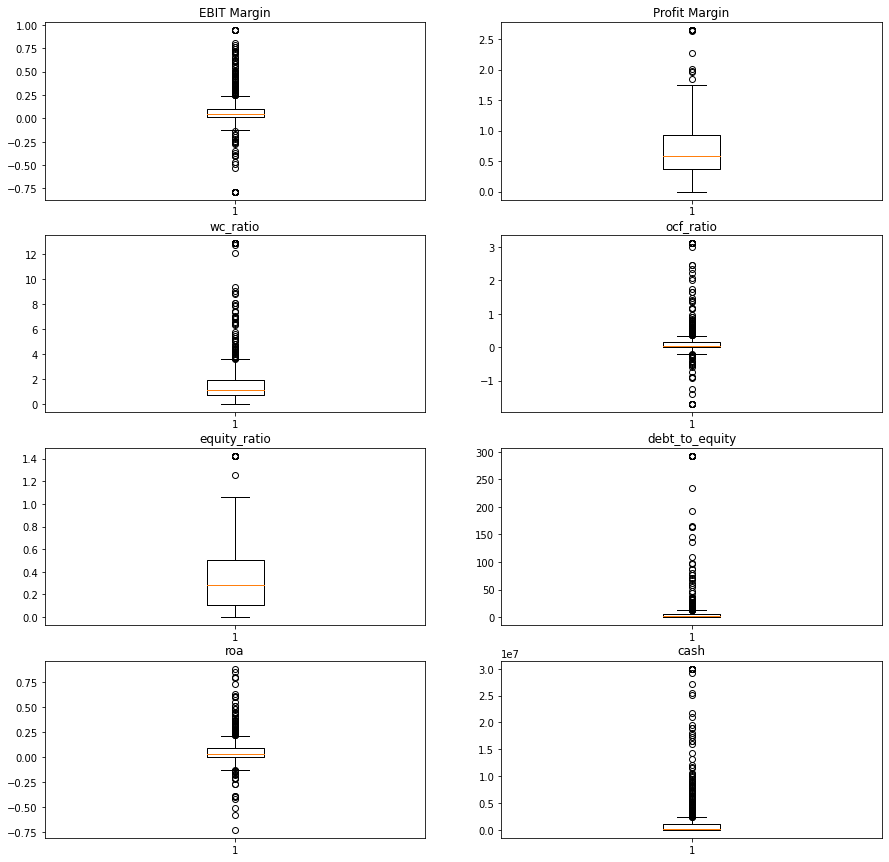

In [21]:
f, ax = plt.subplots(4, 2, figsize=(15, 15))

ax[0,0].boxplot(df_train['ebit_margin'])
ax[0,0].set_title('EBIT Margin')
ax[0,1].boxplot(df_train['profit_margin'])
ax[0,1].set_title('Profit Margin')
ax[1,0].boxplot(df_train['wc_ratio'])
ax[1,0].set_title('wc_ratio')
ax[1,1].boxplot(df_train['ocf_ratio'])
ax[1,1].set_title('ocf_ratio')
ax[2,0].boxplot(df_train['equity_ratio'])
ax[2,0].set_title('equity_ratio')
ax[2,1].boxplot(df_train['debt_to_equity'])
ax[2,1].set_title('debt_to_equity')
ax[3,0].boxplot(df_train['roa'])
ax[3,0].set_title('roa')
ax[3,1].boxplot(df_train['cash'])
ax[3,1].set_title('cash')
plt.show()

## Univariate Analysis

### Univariate Logit Regressions
See the significance of every variable possible in the training set in an univariate setting and where NAs are dropped. We also ordered them according to their p values. Important to note here is the p value is not a KO-criteria for us. Also we do these regressions before data cleansing, which is another important thing to consider. The aim of this is only to see if their is some clear evidence for significant features in the data in the first place.

In [22]:
col_list = df_train.columns[2:]
col_list
dictionary_logit = dict()

for i in range(0,len(col_list)):
    try:
        univ_var = pd.concat((df_train['default'],df_train[col_list[i]]),axis=1)
        y = univ_var["default"]
        X = univ_var.iloc[:,1]
        X = sm.add_constant(X)
        model = sm.Logit(y,X,missing="drop").fit(disp=False,maxiter=100)
        #print(model.summary2()) #comment that out if you don't want to see the regression summary
        pvalue = model.pvalues[1]
        dictionary_logit[col_list[i]] = (pvalue,univ_var.iloc[:,1].isnull().sum())
    except:
        continue

In [23]:
dictionary_logit = pd.DataFrame.from_dict(dictionary_logit,orient="index",columns=['P-Value','NAs']).sort_values(by="P-Value")
dictionary_logit

,P-Value,NAs
cash,0.037583,0
year_inc,0.055778,0
total_equity,0.084170,0
wc_ratio,0.085508,0
profit_margin,0.143273,0
gross_profit,0.157463,0
age_cat,0.170428,0
roa,0.220524,0
cf_operating,0.242346,1
bank_liabilities_lt,0.245019,544


Speaking in an univariate context, what we can see here is that no variable shows a very strong significance in the univariate logistic regression with the default variable as dependent variable. Also some variables can be disregarded as their numerical value makes no sense (e.g.: year_inc).  Thus we can argue, that a focus on economic reasoning instead of p-values in the univariate context is a better way to go. 

### Mann-Whitney U Test
Also we perform a Mann-Whitney U Test for all variables to see if there is a difference in those variables between default and non default firms.

In [24]:
col_list

dictionary_mannu = dict()

for i in range(0,len(col_list)):
    try: 
        group_default = df_train[df_train["default"]==1][col_list[i]]
        group_non_default = df_train[df_train["default"]==0][col_list[i]]
        test_stat, pvalue = sci.stats.mannwhitneyu(group_default,group_non_default)
        dictionary_mannu[col_list[i]] = test_stat, pvalue, df_train[col_list[i]].isnull().sum()
    except:
        continue


In [25]:
dictionary_mannu = pd.DataFrame.from_dict(dictionary_mannu,orient="index",
                       columns=['Test statistic','P-Value','NAs']).sort_values(by="P-Value")
dictionary_mannu

,Test statistic,P-Value,NAs
cash,7387.0,0.000036,0
total_equity,8078.0,0.000378,0
trade_receivables_lt,8295.0,0.000735,644
trade_payables_lt,8433.0,0.001102,664
bonds_payables_lt,8470.0,0.001226,668
bonds_payables_st,8470.0,0.001226,668
monetary_current_assets,8691.0,0.002271,0
bonds_payables_mt,8853.0,0.003492,663
equity_ratio,8901.5,0.003953,0
result_from_ord_bus,8910.0,0.004045,0


In [26]:
#merge both results together
summary = pd.concat((dictionary_logit.iloc[:,0],dictionary_mannu.iloc[:,1:]),axis=1,)
summary.columns = ["P-Value Univ. Logit","P-Value MannU","NAs"]
summary

,P-Value Univ. Logit,P-Value MannU,NAs
cash,0.037583,0.000036,0
year_inc,0.055778,0.255359,0
total_equity,0.084170,0.000378,0
wc_ratio,0.085508,0.009051,0
profit_margin,0.143273,0.070283,0
gross_profit,0.157463,0.011038,0
age_cat,0.170428,0.083892,0
roa,0.220524,0.210278,0
cf_operating,0.242346,0.006266,1
bank_liabilities_lt,0.245019,0.073125,544


### Categorical Variables

In [27]:
catvar = [i for i in list(df_train.columns)[1:] if df_train[i].dtype=='O']

for i in catvar:
    tmp1 = pd.crosstab(df_train['default'], df_train[i]).apply(lambda x: np.round(x/x.sum() * 100,2)).T.sort_values(by = i ,ascending=False)
    tmp2 = pd.crosstab(df_train['default'], df_train[i]).T.rename(columns={False: 'N_False', True: 'N_True'})
    tmp3 = pd.DataFrame(tmp2.apply(sum, axis=1), columns=['N'])
    tmp4 = tmp3.apply(lambda x: np.round(x/x.sum() * 100,2)).rename(columns={'N': 'N_Perc'})
    tmp = tmp1.join(tmp2).join(tmp3).join(tmp4)
    print('====================================================')
    print('Variable: ',i)
    print('---------------------------------------------------')
    print(tmp)
    print()
    del tmp1, tmp2, tmp3, tmp4, tmp

Variable:  legal_form
---------------------------------------------------
                              0      1  N_False  N_True    N  N_Perc
legal_form                                                          
Verein                   100.00   0.00        1       0    1    0.15
Sonst. Gewerbetreibende   88.24  11.76       15       2   17    2.54
OHG                      100.00   0.00        4       0    4    0.60
KG                        80.00  20.00        4       1    5    0.75
GmbH & Co. KG             91.67   8.33       88       8   96   14.37
GmbH                      95.04   4.96      460      24  484   72.46
Genossenschaft           100.00   0.00       15       0   15    2.25
Freiberufler              80.00  20.00        4       1    5    0.75
Einzelfirma               88.89  11.11        8       1    9    1.35
BGB-Gesellschaft         100.00   0.00        4       0    4    0.60
AG                        96.43   3.57       27       1   28    4.19

Variable:  type_pl
---------

# Our Variables of interest
In this section we want to focus on our variables of interest, which are mainly choosen because of economic reasoning. These are:

- Age
- Cash
- Profit Margin
- EBIT Margin
- Working Capital Ratio
- Operating Cashflow Ratio
- Equity Ratio
- Debt-to-Equity Ratio
- Return on Assets

## Results of both univariate Tests

As already stated before, economic reasoning is our main argument to choose a variable for our regression. Nevertheless it is important to see the results of the univariate tests in the section before.

In [28]:
col_list = ["age_num","cash","profit_margin","ebit_margin","wc_ratio","ocf_ratio","equity_ratio","debt_to_equity","roa"]
summary.loc[col_list,:]

,P-Value Univ. Logit,P-Value MannU,NAs
age_num,0.721892,0.256055,0
cash,0.037583,0.000036,0
profit_margin,0.143273,0.070283,0
ebit_margin,0.567159,0.284780,0
wc_ratio,0.085508,0.009051,0
ocf_ratio,0.444895,0.336994,0
equity_ratio,0.544274,0.003953,0
debt_to_equity,0.691734,0.199307,0
roa,0.220524,0.210278,0


## Visualize differences in our variables of interest between default and non default 

Here we just want to visualize the difference in our variables of interest between default and non default firms in our training dataset.

In [29]:
col_list = ["default","age_num","cash","profit_margin","ebit_margin","wc_ratio","ocf_ratio","equity_ratio","debt_to_equity","roa"]
df_train[col_list]

,default,age_num,cash,profit_margin,ebit_margin,wc_ratio,ocf_ratio,equity_ratio,debt_to_equity,roa
0,0,121.0,10297047.50,0.361114,0.061157,5.142587,0.065368,0.738567,0.352444,1.494000e-01
1,0,45.0,926383.75,1.104725,0.027363,0.663710,-1.713468,0.389698,1.560542,9.655827e-02
2,0,59.0,9146283.79,2.640070,0.023240,3.328108,2.471134,0.000937,163.778649,-2.540307e-17
3,0,49.0,6890565.23,2.640070,0.133260,3.193566,0.391307,0.592532,0.236311,2.980723e-02
4,0,113.0,5036615.09,1.135876,0.489225,0.102055,1.178664,0.417496,1.329259,2.607926e-02
...,...,...,...,...,...,...,...,...,...,...
664,0,44.0,31000.00,0.506472,0.013336,0.835583,0.009571,0.182336,4.484386,-2.783753e-03
665,0,21.0,252537.31,0.446851,0.047281,1.213142,-0.083731,0.341823,1.925494,1.555806e-01
666,0,21.0,573037.66,1.000000,0.298976,0.041927,0.032679,0.000000,0.000000,1.289209e-02
667,0,14.0,5652.17,1.049012,0.053456,0.615002,0.137266,0.000000,0.000000,6.375280e-02


### Age

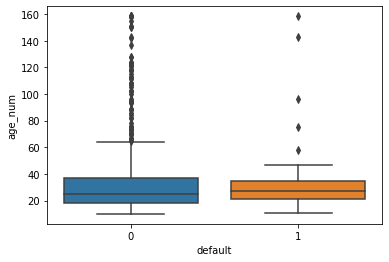

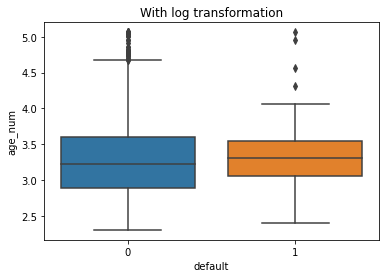

<Figure size 432x288 with 0 Axes>

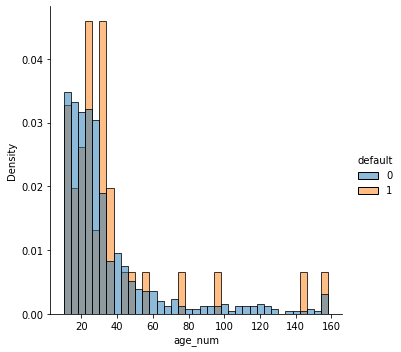

In [30]:
sns.boxplot(y="age_num",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["age_num"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="age_num",hue="default",stat="density",common_norm=False);

### Cash

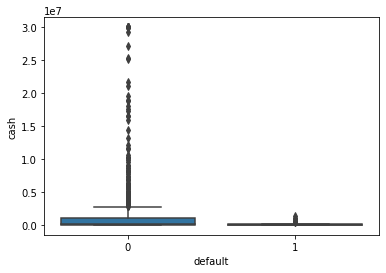

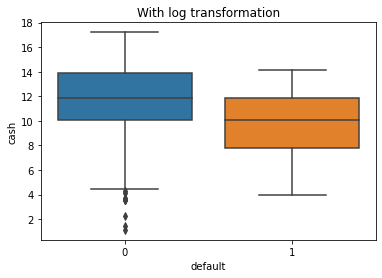

<Figure size 432x288 with 0 Axes>

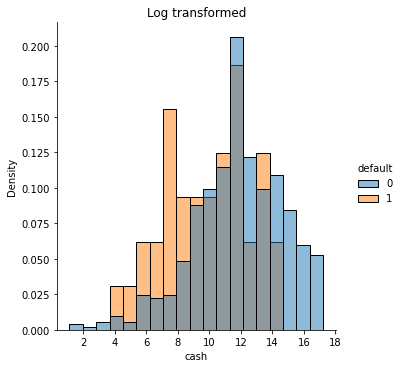

In [31]:
sns.boxplot(y="cash",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["cash"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x=np.log(df_train["cash"]),hue="default",stat="density",common_norm=False)
plt.title("Log transformed");

### Profit Margin

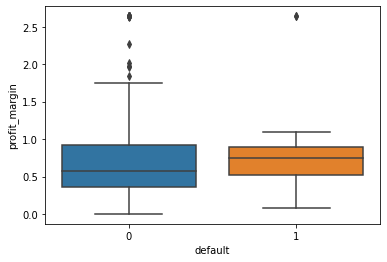

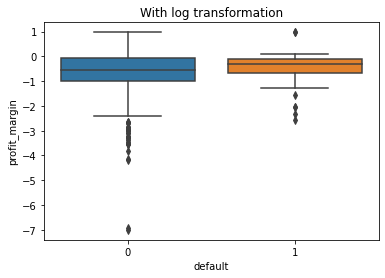

<Figure size 432x288 with 0 Axes>

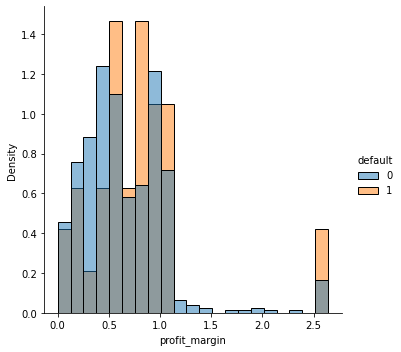

In [32]:
sns.boxplot(y="profit_margin",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["profit_margin"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="profit_margin",hue="default",stat="density",common_norm=False);

### Ebit Margin

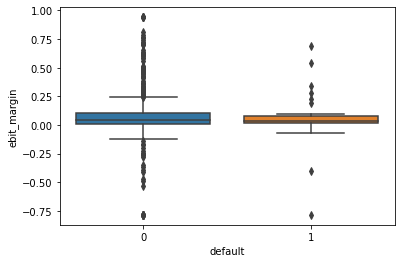

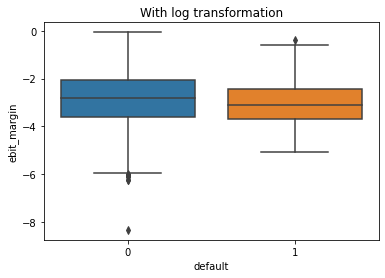

<Figure size 432x288 with 0 Axes>

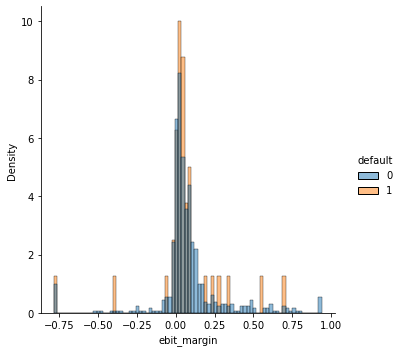

In [33]:
sns.boxplot(y="ebit_margin",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["ebit_margin"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="ebit_margin",hue="default",stat="density",common_norm=False);

### Working Capital Ratio

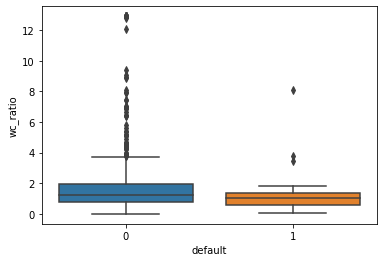

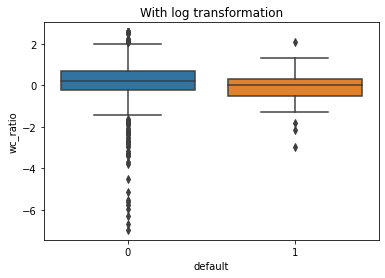

<Figure size 432x288 with 0 Axes>

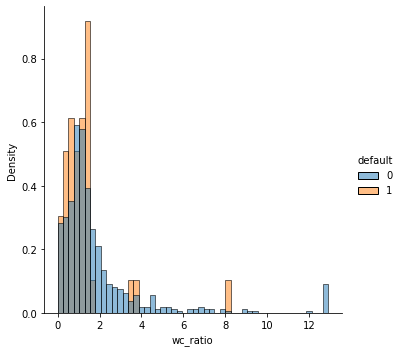

In [34]:
sns.boxplot(y="wc_ratio",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["wc_ratio"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="wc_ratio",hue="default",stat="density",common_norm=False);

### Operating Cash Flow Ratio

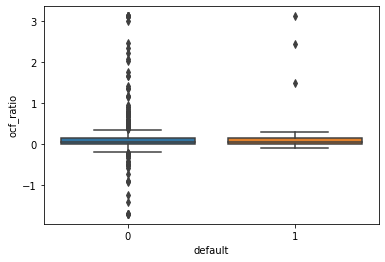

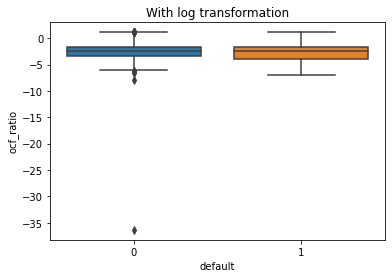

<Figure size 432x288 with 0 Axes>

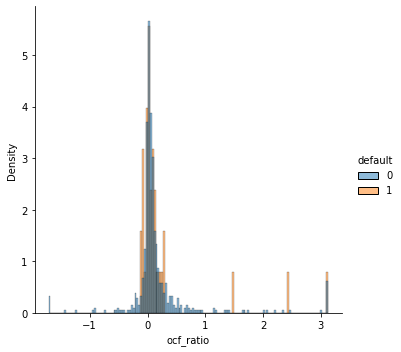

In [35]:
sns.boxplot(y="ocf_ratio",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["ocf_ratio"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="ocf_ratio",hue="default",stat="density",common_norm=False);

### Equity Ratio 

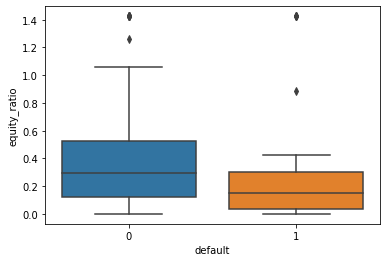

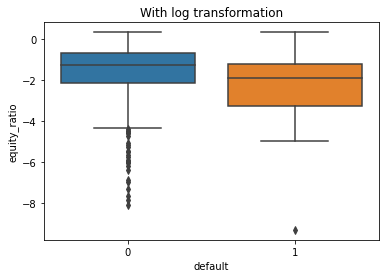

<Figure size 432x288 with 0 Axes>

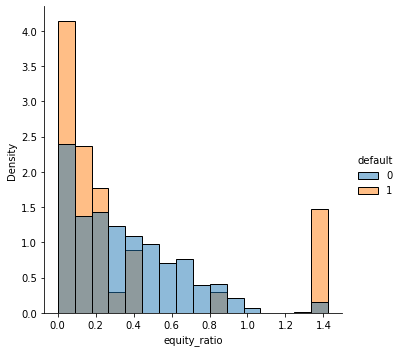

In [36]:
sns.boxplot(y="equity_ratio",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["equity_ratio"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="equity_ratio",hue="default",stat="density",common_norm=False);

### Debt-to-Equity Ratio

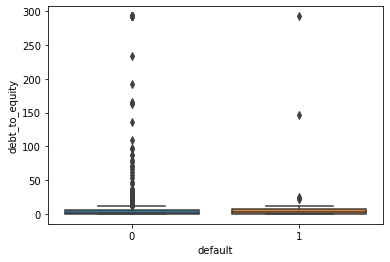

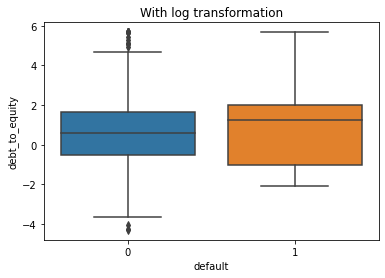

<Figure size 432x288 with 0 Axes>

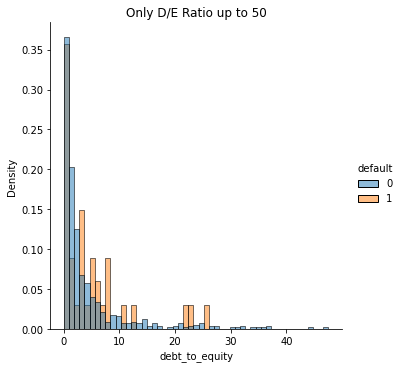

In [37]:
sns.boxplot(y="debt_to_equity",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["debt_to_equity"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
data = df_train[df_train["debt_to_equity"] < 50]
sns.displot(data,x="debt_to_equity",hue="default",stat="density",common_norm=False)
plt.title("Only D/E Ratio up to 50");

## Multivariate Analysis - Correlation Matrix/Heatmap

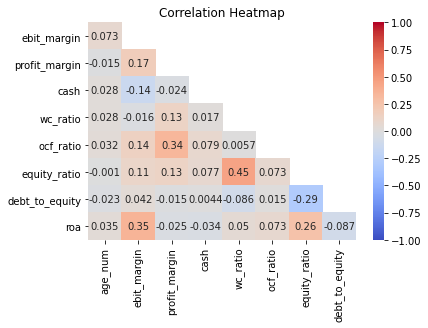

,age_num,ebit_margin,profit_margin,cash,wc_ratio,ocf_ratio,equity_ratio,debt_to_equity
ebit_margin,0.073199,1.000000,0.174436,-0.138188,-0.016350,0.144134,0.109361,0.041610
profit_margin,-0.015169,0.174436,1.000000,-0.023509,0.127968,0.337587,0.131763,-0.015116
cash,0.028085,-0.138188,-0.023509,1.000000,0.017219,0.078503,0.076800,0.004397
wc_ratio,0.028088,-0.016350,0.127968,0.017219,1.000000,0.005698,0.446454,-0.086427
ocf_ratio,0.032462,0.144134,0.337587,0.078503,0.005698,1.000000,0.073305,0.014827
equity_ratio,-0.001019,0.109361,0.131763,0.076800,0.446454,0.073305,1.000000,-0.293038
debt_to_equity,-0.022834,0.041610,-0.015116,0.004397,-0.086427,0.014827,-0.293038,1.000000
roa,0.034984,0.353960,-0.024992,-0.034476,0.050424,0.073164,0.260223,-0.086948


In [38]:
col = ['age_num','ebit_margin', 'profit_margin', 'cash', 'wc_ratio', 'ocf_ratio', 'equity_ratio', 'debt_to_equity', 'roa']
data = df_train[col]
#print(data.head(10))
#print(data.info())

df_corr = data.corr()
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
mask = mask[1:, :-1]
corr = pd.DataFrame(df_corr.iloc[1:,:-1].copy())

heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap="coolwarm")
heatmap.set_title('Correlation Heatmap')
plt.show()

corr

# Our Logit Regression

In [39]:
mdl1 = sm.Logit.from_formula('default ~ age_num + cash + profit_margin + ebit_margin + wc_ratio + ocf_ratio + equity_ratio + debt_to_equity + roa + 1',
                            data=df_train).fit(disp=False, maxiter=100)
print(mdl1.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.086    
Dependent Variable: default          AIC:              286.5795 
Date:               2021-01-06 18:14 BIC:              331.6224 
No. Observations:   668              Log-Likelihood:   -133.29  
Df Model:           9                LL-Null:          -145.83  
Df Residuals:       658              LLR p-value:      0.0028775
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     11.0000                                     
----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------
Intercept        -2.5497   0.4558 -5.5937 0.0000 -3.4431 -1.6563
age_num           0.0039   0.0054  0.7206 0.4712 -0.0067  0.0145
cash             -0.0000   0.0000 -1.9744 0.0483 -0.0000 -0.0000
profit_margin     0.4210   0.4090  1.0294 0.3033 -

In [40]:
y = df_train["default"]
X = df_train[['age_num','cash', 'profit_margin', 'ebit_margin', 'wc_ratio', 'ocf_ratio', 'equity_ratio', 'debt_to_equity', 'roa']]
X = sm.add_constant(X)


mdl2 = sm.Logit(y,X).fit()
mdl2.summary2()

Optimization terminated successfully.
         Current function value: 0.199536
         Iterations 11


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Pseudo R-squared: 0.086    
Dependent Variable: default          AIC:              286.5795 
Date:               2021-01-06 18:14 BIC:              331.6224 
No. Observations:   668              Log-Likelihood:   -133.29  
Df Model:           9                LL-Null:          -145.83  
Df Residuals:       658              LLR p-value:      0.0028775
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     11.0000                                     
----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------
const            -2.5497   0.4558 -5.5937 0.0000 -3.4431 -1.6563
age_num           0.0039   0.0054  0.7206 0.4712 -0.0067  0.0145
cash             -0.0000   0.0000 -1.9744 0.0483 -0.0000 -0.0000
profit_margin     0.4210   0.4090  1.0294 0.3033 -0.3806  1.2226
ebit_margin      -0.8907   0.7670 -1.1612 0.2456 -2.3940  0.6127
wc_ratio         -0.2359   0.1395 -1.6918 0.0907 -0.5092  0.0374
ocf_ratio         0.1301   0.2827  0.4602 0.6453 -0.4240  0.6843
equity_ratio      0.3934   0.5808  0.6773 0.4982 -0.7451  1.5318
debt_to_equity    0.0008   0.0035  0.2280 0.8196 -0.0061  0.0077
roa              -1.3027   1.4209 -0.9168 0.3593 -4.0875  1.4822
================================================================

"""

In [41]:
# see how our model would have predicted the defaults 
s = pd.concat([df_train["default"],round(mdl1.predict(X)*100,2)],axis=1,)
s.columns = ["default","estimated PD in %"]
s.sort_values(by="estimated PD in %",ascending=False)

,default,estimated PD in %
419,1,40.20
358,0,35.98
15,0,25.78
544,0,22.85
212,1,22.30
...,...,...
476,0,0.00
440,0,0.00
432,0,0.00
410,0,0.00


In [42]:
s[s["default"] == 1]

,default,estimated PD in %
32,1,3.67
43,1,8.29
69,1,7.30
104,1,12.17
114,1,4.99
120,1,6.43
128,1,10.46
139,1,9.02
150,1,10.75
198,1,7.41


In [43]:
# Splitting data into training and testing sets.
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
 
# The splited Logit Model
mdl2split = sm.Logit(train_labels,train_features).fit()
mdl2split.summary2()

# Predict the test data
predictions_split = mdl2split.predict(test_features)
# Predict the training data
predictions_split_train = mdl2split.predict(train_features)

# Calculate the absolute errors
errors = abs(predictions_split - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '.')

Optimization terminated successfully.
         Current function value: 0.199624
         Iterations 11
Mean Absolute Error: 0.1 .


Out sample: 
AUC (LY):   0.7132936507936508
GINI (LY):  0.4265873015873016


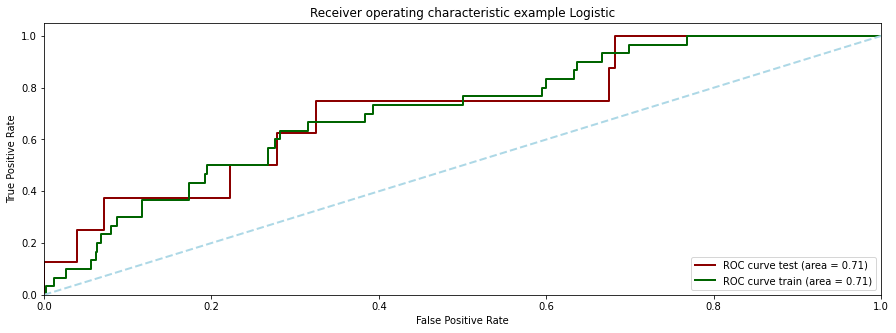

In [44]:
#AUC & Gini Graph + Calculations of splitted logit

fpr_split, tpr_split, thresholds_split = metrics.roc_curve(test_labels, predictions_split)
auc_split = metrics.auc(fpr_split, tpr_split) 

#Predict the in sample (train) data for comparision
fpr_split_train, tpr_split_train, thresholds_split_train = metrics.roc_curve(train_labels, predictions_split_train)
auc_split_train = metrics.auc(fpr_split_train, tpr_split_train)

fig, axes = plt.subplots(figsize=(15,5))
lw = 2
axes = plt.plot(fpr_split, tpr_split, color='darkred',
         lw=lw, label='ROC curve test (area = %0.2f)' % auc_split)
axes = plt.plot(fpr_split_train, tpr_split_train, color='darkgreen',
         lw=lw, label='ROC curve train (area = %0.2f)' % auc_split_train)
axes = plt.plot([0, 1], [0, 1], color='lightblue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example Logistic')
plt.legend(loc="lower right")

print("Out sample: ")
print('AUC (LY):  ',auc_split)
print('GINI (LY): ', 2*auc_split -1)

In sample: 
AUC L1:   0.7076858813700919
GINI L1:  0.41537176274018384
AUC L2:   0.7076858813700919
GINI L2:  0.41537176274018384
Splitted Logit Regression
Out sample: 
AUC Test Sample:   0.7132936507936508
GINI Test Sample:  0.4265873015873016


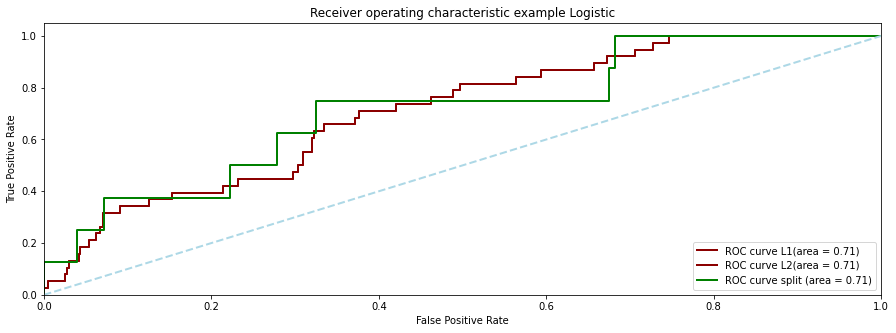

In [45]:
#AUC & Gini Graph + Calculations of old logit regression (red) splitted logit regression (green)
predictions_L1 = mdl1.predict(X)
predictions_L2 = mdl2.predict(X)
#AUC & Gini Graph + Calculations
fpr_L1, tpr_L1, thresholds_L1 = metrics.roc_curve(df_train['default'], predictions_L1)
auc_L1 = metrics.auc(fpr_L1, tpr_L1)

fpr_L2, tpr_L2, thresholds_L2 = metrics.roc_curve(df_train['default'], predictions_L2)
auc_L2 = metrics.auc(fpr_L2, tpr_L2)

fig, axes = plt.subplots(figsize=(15,5))
lw = 2
axes = plt.plot(fpr_L1, tpr_L1, color='darkred',
         lw=lw, label='ROC curve L1(area = %0.2f)' % auc_L1)
axes = plt.plot(fpr_L2, tpr_L2, color='darkred',
         lw=lw, label='ROC curve L2(area = %0.2f)' % auc_L2)
axes = plt.plot(fpr_split, tpr_split, color='green',
         lw=lw, label='ROC curve split (area = %0.2f)' % auc_split)
axes = plt.plot([0, 1], [0, 1], color='lightblue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example Logistic')
plt.legend(loc="lower right")

print("In sample: ")
print('AUC L1:  ',auc_L1)
print('GINI L1: ', 2*auc_L1 -1)
print('AUC L2:  ',auc_L2)
print('GINI L2: ', 2*auc_L2 -1)
print('Splitted Logit Regression')
print("Out sample: ")
print('AUC Test Sample:  ',auc_split)
print('GINI Test Sample: ', 2*auc_split -1)

Our out of sample Gini here highly depends on the random_state we define in out test and train split. Thus multiple different random states are here simulated. Also the test size here is increased to 0.33 as this will be similiar to the sizes of our train (668 firms) and test (330) firms.

In [46]:
# Generate random numbers for different states
#np.random.seed(220497)
random_numbers = np.random.randint(0,1000000,10000)
dictionary_random_test = dict()

for i in random_numbers:
    try:
        # Splitting data into training and testing sets.
        train_features, test_features, train_labels, test_labels = train_test_split(X, 
                                                                                y, test_size = 0.33, 
                                                                                random_state = i, 
                                                                                stratify = y)
        # The splited Logit Model
        mdl2split = sm.Logit(train_labels,train_features).fit()
        mdl2split.summary2()

        # Predict the test data
        predictions_split = mdl2split.predict(test_features)
        # Predict the training data
        predictions_split_train = mdl2split.predict(train_features)
        # Calculate the absolute errors
        errors = abs(predictions_split - test_labels)
    
        #AUC & Gini Graph + Calculations of splitted logit

        fpr_split, tpr_split, thresholds_split = metrics.roc_curve(test_labels, predictions_split)
        auc_split = metrics.auc(fpr_split, tpr_split) 

        # Predict the in sample (train) data for comparision
        fpr_split_train, tpr_split_train, thresholds_split_train = metrics.roc_curve(train_labels, predictions_split_train)
        auc_split_train = metrics.auc(fpr_split_train, tpr_split_train)
    
        #Store values in dictionary
        dictionary_random_test[i] = round(np.mean(errors), 2),auc_split,2*auc_split-1, auc_split_train, 2*auc_split_train-1
        
    except:
        continue

dictionary_random_test = pd.DataFrame.from_dict(dictionary_random_test,orient="index",
                       columns=['MSE','AUC out sample','Gini out of sample',"AUC in sample","Gini in sample"])

;

    Iterations 12
Optimization terminated successfully.
         Current function value: 0.193920
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196426
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195367
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.188939
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.185935
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.194104
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.190130
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191602
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.199046
         Iterations 11
Optimization terminated successfully.
         Current 

''

In [47]:
dictionary_random_test.head()

,MSE,AUC out sample,Gini out of sample,AUC in sample,Gini in sample
527773,0.10,0.687870,0.375740,0.709953,0.419905
107087,0.10,0.613536,0.227071,0.732891,0.465782
53135,0.11,0.625740,0.251479,0.695450,0.390900
43173,0.10,0.634985,0.269970,0.732701,0.465403
552284,0.10,0.629068,0.258136,0.699810,0.399621


In [48]:
dictionary_random_test.describe()

,MSE,AUC out sample,Gini out of sample,AUC in sample,Gini in sample
count,9942.000000,9942.000000,9942.000000,9942.000000,9942.000000
mean,0.107003,0.611207,0.222413,0.726430,0.452860
std,0.005226,0.058253,0.116505,0.029208,0.058416
min,0.090000,0.379808,-0.240385,0.599716,0.199431
25%,0.100000,0.572115,0.144231,0.706919,0.413839
50%,0.110000,0.612796,0.225592,0.726445,0.452891
75%,0.110000,0.650888,0.301775,0.745972,0.491943
max,0.130000,0.808432,0.616864,0.830427,0.660853


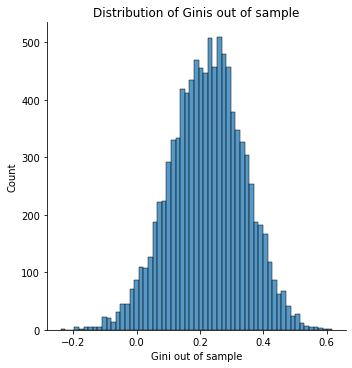

In [49]:
sns.displot(dictionary_random_test["Gini out of sample"])
plt.title("Distribution of Ginis out of sample");

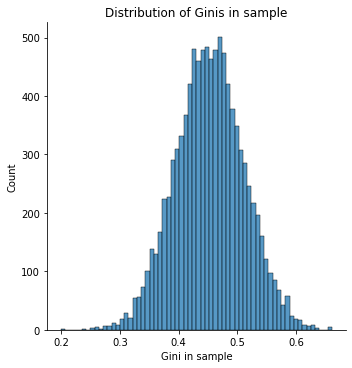

In [50]:
sns.displot(dictionary_random_test["Gini in sample"])
plt.title("Distribution of Ginis in sample");

# Random Forest Approach

In [194]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier


# Splitting data into training and testing sets.
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.1, random_state = 42, stratify = y)



# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 2000, 
                            criterion='gini',
                            max_depth=None,
                            min_samples_split = 5,
                            min_samples_leaf = 3,
                            max_features='auto',
                            bootstrap=True,
                            oob_score=True,
                            random_state = 0,
                            verbose=0,
                            n_jobs= 2 ,
                            class_weight = 'balanced_subsample')


# Train the model on training data
rf.fit(train_features, train_labels)
rf.score(train_features, train_labels)

ValueError: Found input variables with inconsistent numbers of samples: [330, 668]

In [52]:
# Use the forest's predict method on the test data
predictions_rf = rf.predict(test_features)
predictions_rf_insample = rf.predict(train_features)

predictions_prob = rf.predict_proba(test_features)[:, 1]
predictions_prob_rf_insample = rf.predict_proba(train_features)[:,1]
# Calculate the absolute errors
errors = abs(predictions_rf - test_labels)


# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '.')

Mean Absolute Error: 0.06 .


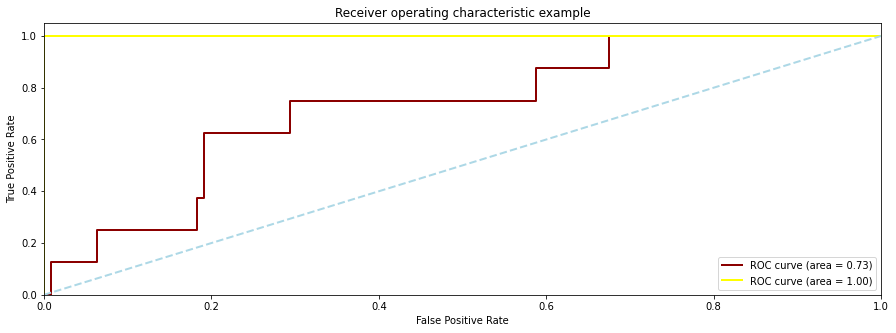

Random Forest Approach
In sample:
AUC :   1.0
GINI:  1.0
Out sample: 
AUC :   0.7261904761904762
GINI:  0.45238095238095233


In [53]:
predicitons_rf_prob = rf.predict_proba(test_features)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(test_labels, predicitons_rf_prob)
auc = metrics.auc(fpr, tpr)

#In Sample measurements
fpr_rf_is, tpr_rf_is, thresholds_rf_is = metrics.roc_curve(train_labels, predictions_prob_rf_insample)
auc_rf_is = metrics.auc(fpr_rf_is, tpr_rf_is)

fig, axes = plt.subplots(figsize=(15,5))
lw = 2
axes = plt.plot(fpr, tpr, color='darkred',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
axes = plt.plot(fpr_rf_is, tpr_rf_is, color='yellow',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_rf_is)        
axes = plt.plot([0, 1], [0, 1], color='lightblue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print("Random Forest Approach")
print("In sample:")
print('AUC :  ',auc_rf_is)
print('GINI: ', 2*auc_rf_is -1)
print("Out sample: ")
print('AUC :  ',auc)
print('GINI: ', 2*auc -1)

In [54]:
weights =np.array([18 if i == 1 else 0.9 for i in train_labels])
# Train the model on training data
rf.fit(train_features, train_labels, sample_weight = weights)

RandomForestClassifier(class_weight='balanced_subsample', min_samples_leaf=3,
                       min_samples_split=5, n_estimators=2000, n_jobs=2,
                       oob_score=True, random_state=0)

# Coming to the Test Sample

In [55]:
df_test

,legal_form,zip_code,sector,year_inc,count_emp,type_pl,sales,gross_performance,gross_profit,earn_from_op,...,cf_financing,age_num,wc_ratio,ebit_margin,ocf_ratio,profit_margin,equity_ratio,total_liabilities,debt_to_equity,roa
id,,,,,,,,,,,,,,,,,,,,,
C_411,GmbH,14089,69204,1986,NaN,GKV,7.289467e+05,7.289467e+05,2.097214e+05,45390.50,...,-5.457891e+04,35.0,0.525518,0.062269,0.072204,0.287705,0.000000,214860.19,0.000000,0.170458
C_896,GmbH,13127,87100,1992,181.0,GKV,7.088473e+05,7.088473e+05,7.384952e+05,13017.29,...,-5.820000e-11,29.0,1.425898,0.018364,-0.014919,1.041825,0.537732,380723.43,0.859662,0.008835
C_252,GmbH,14059,86101,1993,505.0,GKV,2.602532e+07,2.601554e+07,2.202299e+07,2086104.36,...,-2.091456e+06,28.0,3.165258,0.080157,0.109983,0.846214,0.367217,4582487.49,0.333668,0.061106
C_165,GmbH,10437,87100,1995,82.0,GKV,1.105332e+06,1.105332e+06,7.174051e+05,88074.80,...,-1.160000e-10,26.0,3.911569,0.079682,0.141362,0.649040,0.790521,98099.72,0.256812,0.124279
C_856,GmbH,14943,96090,2002,22.0,GKV,5.199542e+07,5.197990e+07,4.642084e+07,5956777.13,...,-4.163971e+06,19.0,2.482512,0.114563,0.109550,0.892787,0.160017,27576629.40,4.038464,0.119625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C_691,GmbH,83435,8930,1994,433.0,GKV,2.224117e+07,2.212290e+07,1.135134e+07,899393.22,...,1.124341e+06,27.0,0.734363,0.040438,0.124799,0.510375,0.037415,8211837.02,25.727209,0.071062
C_970,GmbH & Co. KG,89180,10390,1928,NaN,GKV,1.049671e+08,1.049671e+08,1.076738e+08,6771828.14,...,-1.163975e+07,93.0,1.467173,0.064514,0.138103,1.025786,0.349197,63957453.47,1.863716,0.047456
C_157,GmbH,82438,46495,1997,NaN,GKV,2.092688e+07,2.092688e+07,5.232887e+06,917317.49,...,-5.370269e+05,24.0,1.406278,0.043834,0.026051,0.250056,0.419103,4102001.75,1.386047,0.089689


In [216]:
X = df_test[['age_num','cash', 'profit_margin', 'ebit_margin', 'wc_ratio', 'ocf_ratio', 'equity_ratio', 'debt_to_equity', 'roa']]
#X = sm.add_constant(X) #weiß nicht ob man das mochen soll/ bei den PDs ändert sich nichts

X.loc['C_712','ocf_ratio'] = 0
X.loc['C_712']

age_num               67.000000
cash              163684.740000
profit_margin          0.454304
ebit_margin            0.084466
wc_ratio               1.391674
ocf_ratio              0.000000
equity_ratio           0.356453
debt_to_equity         1.805421
roa                    0.189193
Name: C_712, dtype: float64

In [219]:
prediction = pd.DataFrame(mdl1.predict(X))
x = round(prediction*100,2)

In [220]:
x.describe()

,0
count,330.000000
mean,7.087606
std,11.786156
min,0.000000
25%,2.422500
50%,6.030000
75%,8.057500
max,100.000000


In [221]:
x.sort_values(by=0,ascending=False)

,0
id,
C_382,100.00
C_445,100.00
C_557,91.93
C_717,91.69
C_961,88.62
...,...
C_895,0.00
C_428,0.00
C_872,0.00


In [65]:
df_test.loc["C_712"] #der geht nicht

legal_form                        GmbH
zip_code                         78056
sector                           26119
year_inc                          1954
count_emp                           93
type_pl                            GKV
sales                      7.29882e+07
gross_performance          7.43735e+07
gross_profit               3.31588e+07
earn_from_op                 6.165e+06
fin_result                     -447509
oth_interest_inc               60211.8
oth_interest_exp                507721
result_from_ord_bus        5.71749e+06
total_result               5.60547e+06
annual_profit              5.29181e+06
total_assets               2.79705e+07
total_liabilities_st       1.09504e+07
total_liabilities_mt                 0
total_liabilities_lt       7.04987e+06
bank_liabilities_st                NaN
bank_liabilities_mt                NaN
bank_liabilities_lt                NaN
trade_payables_st          3.11138e+06
trade_payables_mt                  NaN
trade_payables_lt        

## Random Forest Export

In [150]:
X = sm.add_constant(X) #weiß nicht ob man das mochen soll/ bei den PDs ändert sich nichts
X_rf = X.copy()
i_ndex = X.index
#X_rf = X.reset_index()
#X_rf = X_rf.set_index('id')
#X_rf = X_rf.drop('id', axis=1)
X_rf.replace([np.inf, -np.inf], np.nan, inplace=True)
#X_rf = np.array(X_rf)

In [114]:
X_rf.replace(np.nan, 0, inplace=True)
#np.where(np.isnan(X_rf))

In [182]:
y_RF = pd.DataFrame(rf.predict(X_rf),columns={'Default'},index=i_ndex)
y_RF_prob = pd.DataFrame(rf.predict_proba(X_rf),index=i_ndex)
y_RF_prob = round(y_RF_prob*100,2)

y_RF_prob.sort_values(by=1, ascending=False)

,0,1
id,,
C_409,37.79,62.21
C_966,43.08,56.92
C_604,43.60,56.40
C_545,52.47,47.53
C_086,53.34,46.66
...,...,...
C_143,100.00,0.00
C_434,100.00,0.00
C_977,100.00,0.00


In [183]:
y_RF.sort_values(by='Default',ascending=False)

,Default
id,
C_409,1
C_966,1
C_604,1
C_411,0
C_159,0
...,...
C_621,0
C_155,0
C_483,0


In [190]:
train_RF = pd.concat([y_RF, y_RF_prob], axis=1)
train_RF

,Default,0,1
id,,,
C_411,0,77.56,22.44
C_896,0,95.93,4.07
C_252,0,95.67,4.33
C_165,0,96.72,3.28
C_856,0,99.70,0.30
...,...,...,...
C_691,0,89.41,10.59
C_970,0,99.65,0.35
C_157,0,99.21,0.79


 # Export
 the Data as a CSV file for the Upload
  

In [227]:
train_RF.to_csv("trained_RF-Approach.csv")

In [226]:
 x.to_csv("trained_Logit-Approach.csv")